## 통계적 실험과 유의성검정

통계적 추론  : 실험은 가설을 검정하기 위해 설계되고, 원하는 최종적인 결론을 도달할 수 있도록 설계

### 3.1 A/B 검정
- 절차중 어느 쪽이 다른 쪽보다 더 우월하다는 것을 입증하기 위해 실험군을 두 그룹으로 나눔
 
 ex) 암을 더 효과적으로 억제하는 두가지 치료법을 검정한다. (자연스럽게 더 좋은 결과를보이는 대상들이 A 또는 B 한쪽에 집중됨)

데이터 과학 분야에서 A/B 검정은 웹 환경에서 많이 사용된다. - 실험이 결국 처리 A 와 B 사이의 결정으로 이어질 경우, 단일 지표 또는 검정통계량을
사전에 미리 정해 놓아야 한다. 연구자 편향이 발생할 수 있기 때문에

### 3.2 가설검정

가설검정 혹은 유의검정은 지금까지 발표된 대부분의 연구 논무에 등장하는 전통적인 통계 분석방법이다.

통계적 가설 검정은 연구자가 랜덤하게 우연히 일어난 일에 속지 않도록 보호하기 위한 방법으로 개발됌 ex) A/B 검정의 경우 한쪽에 가설을 세움

### 3.2.1 귀무가설

그룹 간의 차이는 우연에 의한 결과라는 것을 기본 가정으로 설정한다 - 이를 귀무가설이라 부르며 귀무가설이 틀렸다는 것을 입증해서 A그룹과 B그룹간의 차이가 우연히 아니라는 것을 보여줘야 함

### 3.2.3 일원/이원 가설검정

비교를 통해 새옵션이 완변히 더 나은 것으로 입증되지 않는 이상, 기본 옵션을 계속 사용한다는 게 가정이다.
귀무가설이 사실이라고 가정하고 확률모형을 생성하여 관찰한 효과가 해당 모델로 부터 합리적으로 나올 수 있는 결과인지를 검증하는 것이다.

### 3.3 재표본추출

재표본추출이란 랜덤한 변동설을 알아보자는 일반적인 목표를 가지고, 관찰된 데이터의 값에서 표본을 반복적으로 추출하는 것을 의미한다.

### 3.3.1 순열검정

순열검정 과정 : 여러 그룹의 결과를 단일 데이터 집합으로 결합한다 -> 결합된 데이터를 잘 섞은 후, 그룹 A와 동일한 크기의 표본을 무작위로 추출한다 -> 나머지 데이터에서 그룹 B와 동일한 크기의 샘플을 무작위로 추출한다. -> C,D들의 그룹에 대해서도 동일한 작업을 수행(여기까지 원본 표본의 크기를 반영하는 재표본을 수집했다) -> 원래 샘플에 대해 구한 통계량 또는 추청치가 무엇이었든 간에 지금 추출한 재표본에 대해 모두 다시 계산하고 기록한다. 이것으로 한 번의 순열 반복이 진행된다 -> 압선 단계들을 N번 반복하여 검정통계량의 순열분포를 얻는다.

결론 : 관찰된 차이가 대부분의 순열분포 바깥에 있다면 우리는 이것은 우연 때문이 아니라고 결론 내릴 수 있다 이는 통계적으로 유의미하다.

### 3.3.2 예제: 웹 점착성

ex) 제품이 매우 고가 이므로 매출 주기가 상당히 길다. 실제 매출 데이터를 충분히 얻는 데는 오랜 시간이 걸리므로 대리변수를 사용하여 결과를 측정할 수 있다.
이 회사의 잠재적 대리변수 중 하나는 상세한 제품 설명서 클릭수이다. 따라서 측정 지표를 페이지 A와 페이지 B에서의 평균 클릭수를 비교하는 것으로 정할 수 있음


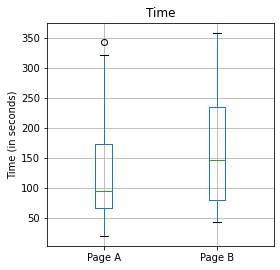

In [1]:
from pathlib import Path
import random
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np


from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt


data_dir = os.getenv('HOME')+'/aiffel/datasci/csvfile'
# data_dir = os.getenv('HOME')+'/aiffel/datasci/csvfile'
# Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.
# data_path = join(data_dir, 'state.csv')
WEB_PAGE_DATA_CSV = join(data_dir, 'web_page_data.csv') 
FOUR_SESSIONS_CSV = join(data_dir, 'four_sessions.csv') 
CLICK_RATE_CSV = join(data_dir, 'click_rates.csv') 
IMANISHI_CSV = join(data_dir, 'imanishi_data.csv') 

## Resampling

session_times = pd.read_csv(WEB_PAGE_DATA_CSV)
session_times.Time = 100 * session_times.Time

ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()


In [2]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)

35.66666666666667


- 페이지 B는 페이지 A와 비교하여 세션 시간이 평균 35.67정도 더 길다. 문제는 이 차이가 우연에 의한 것인지 아니면 통계적으로 중요한 것인지를 판단하는 일이다.

이에 대한 한가지 방법을 순열 검정을 적용하는 것. 모든 세션을 시간을 결함한 다음, 잘 섞은 21개의 그룹과 15개의 그룹으로 반복하여 표본을 추출 (36개 데이터 존재)

In [3]:
# Permutation test example with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

-13.590476190476181


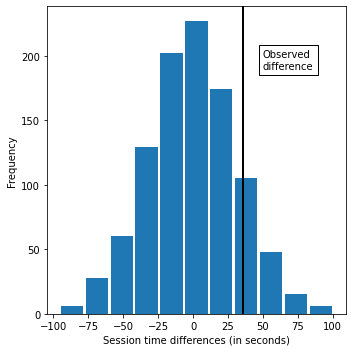

In [13]:
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- 두 평균의 차이를 결과로 반환한다. 이를 1000번 호출 하여 시간의 차이를 히스토그램으로 표시함

In [14]:
print(np.mean(perm_diffs > mean_b - mean_a))

0.121


- 히스토그램을 통해, 무작위 순열로 구한 평균 세션 시간의 차이가 가끔 실제 관찰된 세션 시간의 차이를 넘어가는 것을 볼 수 있다. 실행결과, 이경우는 12.6% 확률로 발생한다.
- 세션시간의 차이가 확률분포 범위 내에 있음으로 통계적으로 의미가 없다.

### 3.3.3 전체 및 부트스트랩 순열검정
- 전체순열검정

데이터를 무작위로 섞고 나누는 대신 실제로 나눌 수 있는 모든 가능한 조합을 찾는다. 샘플크기가 비교적 작을 때만 실용적
- 부트스트랩

무작위 순열검정의 2단계와 3단계에서 비복원으로 하던 것을 복원추출로 수행한다, 재표본추출 과정에서 모집단에서 개체를 선택할 때 임의성을 보장할 뿐만 아니라 개체가 처리군에 할당될 때에도 임의성을 보장한다. - 비 실용적

### 3.4 통계적 유의성과 p값

통계적 유의성이란, 통계학자가 자신의 실험 결과가 우연히 일어난 것인지 아니면 우연히 일어날 수 없는 극단적인 것이지를 판단하는 방법이다.
- P값: 귀무가설을 구체화한 기회 모델이 주어졌을 때 관측된 결과와 같이 특이하거나 극단적인 결과를 얻을 확률



Observed difference: 0.0368%


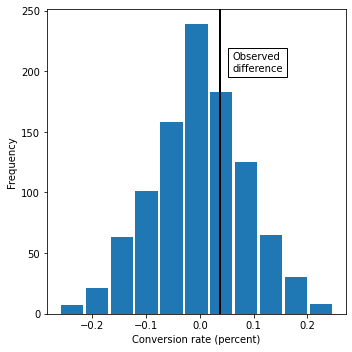

In [6]:
## Statistical Significance and P-Values

random.seed(1)
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) 
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

128p 설명

### 3.4.1 p값
그래프를 눈으로 보는 것보다는 p값과 같이 통계적 유의성을 정확히 측정하기 위한 지표가 필요하다. 다시 말해 순열 검정으로 얻은 결과 중에서, 관찰된 차이와 같거나 더 큰 차이를 보이는 경우의 비율로 p값을 추정할 수 있다.

우연히 더은 결과의 30% 정도가 관찰한 것과 비슷한 정도로 예외적인 결과를 얻을 것으로 기대됌

In [7]:
print(np.mean([diff > obs_pct_diff for diff in perm_diffs]))

0.332


In [8]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


정규근사법을 통해, 순열검정에서 얻은 p값과 비슷한 값을 얻음

In [9]:
## 내용을 좀더 첨부